In [1]:
%matplotlib notebook

#Own packages.
if __name__ == "__main__" and __package__ is None:
    from sys import path
    from os.path import dirname as dir

    path.append(dir(path[0]))
    
from src import formatting_helpers
from src import visualisation_helpers

#Other imports.
import mpl_toolkits.mplot3d
import ipywidgets as widgets
import math
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from IPython.core.display import HTML, Math, Latex, Markdown
from functools import reduce

In [ ]:
# display(HTML('<h1>Plotting 3D vectors</h1>'))

# display(HTML('<h2>Create 3x3x3 array from range [0, 9].</h2>'))
# data = np.random.randint(0, 10, size=(3,3,3))
# display(data)
# display(data.shape)

# display(HTML('<h2>Get positions of non-zero items in each of the 3 dimensions.</h2>'))

# display(HTML('<p>How do we make sense of the indexing of each of the 3 tuples?</p>\
#              <p>Imagine each 3x3 array being stacked into a cube, of height 3.</p>\
#              <ol type="1">\
#              <li>We slice this cube horizontally. \
#              Each number lying on each slice, belongs to the same index.</li>\
#              <li>Second, we slice this cube vertically, with slices along the <u>rows</u>.</li>\
#              <li>Third, we slice this cube vertically, with slices along the <u>columns</u>.</li>\
#              </ol>'))

# display(data.nonzero())

# display(HTML('<h2>Plot the location of each number, in 3D.</h2>'))
# z, x, y = data.nonzero() #z represents where each number is along the vertical stack.
# fig, ax = plt.subplots(1, 1, subplot_kw={'projection':'3d'})
# ax.scatter(x, y, z, zdir='z', c='blue')
# plt.show()

# fig_3d = go.Figure(data=[go.Scatter3d(x=x, y=y, z=z,
#                                    mode='markers', marker_size=2)])


# fig_3d.show()

In [ ]:
display(HTML('<h1>Section 1.2</h1>'))
display(HTML('<h2>Problem 23</h2>'))

display(HTML('<p>We establish that:</p>'))
display(Math(r'''
\begin{align}
cos \beta &= \frac{w_1}{||\boldsymbol{w}||} \\
sin \beta &= \frac{w_2}{||\boldsymbol{w}||}
\end{align}
'''))
display(HTML('<hr style="height:2px; border:none; color:#000; background-color:#000;">'))

display(HTML('<p>With the above, our job is to arrive at:</p>'))
display(Math(r'''
\begin{align}
cos \theta &= \frac{\boldsymbol{v} \cdot \boldsymbol{w}}{||\boldsymbol{v}||*||\boldsymbol{w}||} \\
\end{align}
'''))
display(HTML('<hr style="height:2px; border:none; color:#000; background-color:#000;">'))

display(HTML('<p>So we do this:</p>'))
display(Math(r'''
\begin{align}
cos \theta &= cos(\beta - \alpha) \\
&= cos \beta cos \alpha + sin \beta sin \alpha \\
&= \frac{w_1}{||\boldsymbol{w}||} * \frac{v_1}{||\boldsymbol{v}||} + \frac{w_2}{||\boldsymbol{w}||} * \frac{v_2}{||\boldsymbol{v}||}\\
&= \frac{w_1*v_1 + w_2*v_2}{||\boldsymbol{w}||*||\boldsymbol{v}||} \\
&= \frac{\boldsymbol{v} \cdot \boldsymbol{w}}{||\boldsymbol{v}||*||\boldsymbol{w}||}
\end{align}
'''))
display(HTML('<hr style="height:2px; border:none; color:#000; background-color:#000;">'))

# display(Markdown(r'''
# \begin{equation*}
# \left( \sum_{k=1}^n a_k b_k \right)^2 \leq \left( \sum_{k=1}^n a_k^2 \right) \left( \sum_{k=1}^n b_k^2 \right)
# \end{equation*}

# '''))

# $$\begin{align}
#     3=2
#     2=3
# \end{align}$$


In [ ]:
display(HTML('<h2>Problem 28</h2>'))

display(HTML('<p>Why does the vector lie on a line?</p>\
<p>Analytically, because the equation is linear.</p>\
<p>Incrementally, as <i>x</i> changes,\
we know that <i>y</i> must change.\
<ul>\
<li>What is the relationship between these two changes?</li>\
<li><i>y</i> changes at a constant proportion to how <i>x</i> changes.</li>\
<li>Seen another way, (1,2) is a matrix with 1 row, that squishes (x,y) from 2 dimensions to a number-line expressed along the vector (1,2).<br>\
This squishing is in fact linear. \
Meaning this maintains the <u>difference</u> between points on <i>x</i> and the <u>difference</u> between points on <i>y</i>.</li>\
</ul></p>'))

display(HTML('<p>Shortest vector will be the vector that lies directly on the other vector.\
Because this vector will exert maximum influence over the other vector.</p>\
<p>So, the vector will be this:</p>'))
display(Math(r'c\begin{bmatrix} 1 \\ 2 \end{bmatrix}'))

display(HTML('<p>And we arrive at the length of the shortest vector...'))
display(Math(r'\begin{align} \
\begin{bmatrix} 1 \\ 2 \end{bmatrix} \cdot w &= \begin{bmatrix} 1 \\ 2 \end{bmatrix} \cdot c\begin{bmatrix} 1 \\ 2 \end{bmatrix}\\ \
\begin{bmatrix} 1 \\ 2 \end{bmatrix} \cdot c\begin{bmatrix} 1 \\ 2 \end{bmatrix} &= 5\\ \
c &= 1 \\ \
||\boldsymbol{w}||_{min} &= \sqrt{1^2+2^2} \\ \
&= \sqrt{5} \
\end{align}'))

In [2]:
display(HTML('<h2>Problem 30</h2>'))

display(HTML('<p>It is possible.<br>\
Each angle has to be greater than Theta/2, and it is possible since we can divide 2*Theta by 3.</p>'))

result = widgets.interact(visualisation_helpers.plot_threeVectors,
                a_1=widgets.FloatSlider(min=-1, max=1, step=0.01, value=1, continuous_update=False),
                a_2=widgets.FloatSlider(min=-1, max=1, step=0.01, value=0, continuous_update=False),
                b_1=widgets.FloatSlider(min=-1, max=1, step=0.01, value=-0.5, continuous_update=False),
                b_2=widgets.FloatSlider(min=-1, max=1, step=0.01, value=math.sqrt(3)/2, continuous_update=False),
                c_1=widgets.FloatSlider(min=-1, max=1, step=0.01, value=-0.5, continuous_update=False),
                c_2=widgets.FloatSlider(min=-1, max=1, step=0.01, value=-math.sqrt(3)/2, continuous_update=False)
                )


interactive(children=(FloatSlider(value=1.0, continuous_update=False, description='a_1', max=1.0, min=-1.0, st…

In [ ]:
display(HTML('<h1>Section 1.3</h1>'))
display(HTML('<h2>Problem 4</h2>'))

display(Math(r'''
\begin{align}

\begin{bmatrix}
1 & 4 & 7 \\
2 & 5 & 8 \\
3 & 6 & 9 \\
\end{bmatrix}

&\to\ \begin{bmatrix}
1 & 4 & 7 \\
0 & {-3} & {-6} \\
3 & 6 & 9 \\
\end{bmatrix}

\\ &\to\ \begin{bmatrix}
1 & 4 & 7 \\
0 & -3 & -6 \\
0 & -6 & -12 \\
\end{bmatrix}

\\ &\to\ \begin{bmatrix}
1 & 4 & 7 \\
0 & 1 & 2 \\
0 & -6 & -12 \\
\end{bmatrix}

\\ &\to\ \begin{bmatrix}
1 & 4 & 7 \\
0 & 1 & 2 \\
0 & 1 & 2 \\
\end{bmatrix}

\\ &\to\ \begin{bmatrix}
1 & 4 & 7 \\
0 & 1 & 2 \\
0 & 0 & 0 \\
\end{bmatrix}

\\ &\to\ \begin{bmatrix}
1 & 0 & -1 \\
0 & 1 & 2 \\
0 & 0 & 0 \\
\end{bmatrix}

\end{align}
'''))

In [ ]:
display(HTML('<h2>Problem 13</h2>'))

display(HTML('<p>This is the centred 5x5 matrix. What is it <u>not</u> invertible?</p>'))

display(Math(r'''

C=

\begin{bmatrix}
0&1&0&0&0\\
-1&0&1&0&0\\
0&-1&0&1&0\\
0&0&-1&0&1\\
0&0&0&-1&0\\
\end{bmatrix}
'''))

display(Math(r'''
\begin{align}

C\boldsymbol{x} &= \boldsymbol{b}\\
b_1 &= x_2\\
b_2 &= -x_1 + x_3\\
b_3 &= -x_2 + x_4\\
b_4 &= -x_3 + x_5\\
b_5 &= -x_4

\end{align}

'''))

display(Math(r'''

\text{What value of } \boldsymbol{x} \text{ will result in } 0 \text{?}
\\

\begin{align}

x_2 &= 0 \\
x_4 &= 0 \\
x_3 &= x_1 =x_5\\

\boldsymbol{x} &=

\begin{bmatrix}
1\\
0\\
1\\
0\\
1\\
\end{bmatrix}
\\
\text{Or any combination of } \boldsymbol{x} \text{.}

\\
\text{Following combination of } \boldsymbol{b} \text{ will give 0.}

\\
b_1 + b_3 + b_5 &= 0

\end{align}

'''))

In [3]:
display(HTML('<h1>Section 2.1</h1>'))
display(HTML('<h2>Problem 29</h2>'))

transition_matrix = np.matrix([[0.8, 0.3], [0.2, 0.7]])
vector = np.matrix([[1],[0]])

# display(transition_matrix * transition_matrix * vector)

for idx in range(1, 5):
    vector_name = 'u'+str(idx)
    display(HTML('<p>Vector <b>{}</b> is:</p>'.format(vector_name)))
    vector = transition_matrix*vector
    display(vector)
    
    display((HTML('<hr>')))

# x1 = np.arange(9.0).reshape((3, 3))
# x2 = np.arange(3.0)
# display(x1)
# display(x2)
# np.multiply(x1, x2)

display(transition_matrix*transition_matrix*transition_matrix*transition_matrix)

matrix([[0.8],
        [0.2]])

matrix([[0.7],
        [0.3]])

matrix([[0.65],
        [0.35]])

matrix([[0.625],
        [0.375]])

matrix([[0.625 , 0.5625],
        [0.375 , 0.4375]])

In [4]:
display(HTML('<h2>Problem 29</h2>'))

transition_matrix = np.matrix([[0.8, 0.3], [0.2, 0.7]])


display(HTML('<p>What happens if we run <b>u7</b> and also subsequent <b>u</b>-s?</p>'))

display(Math(r'\text{If } \boldsymbol{u_0} \text{ is } \begin{bmatrix}1\\0\end{bmatrix}'))

transition_matrix_new = np.linalg.matrix_power(transition_matrix, 7)
vector = np.matrix([[1],[0]])
vector_u7 = transition_matrix_new * vector
display(Math(formatting_helpers.npMatrix_to_latex(vector_u7)))

display(Math(r'\text{If } \boldsymbol{u_0} \text{ is } \begin{bmatrix}0\\1\end{bmatrix}'))
vector = np.matrix([[0],[1]])
vector_u7 = transition_matrix_new * vector
display(Math(formatting_helpers.npMatrix_to_latex(vector_u7)))

display(HTML('<p>Let\'s plot what happens as we run more iterations.</p>'))

def plot_markov_iters(max_iters):
    
    if max_iters<0:
        return display(HTML('<p><u>Error</u>: Pls enter a positive int for max iterations.</p>'))
    
    else:
        vector_y1 = np.matrix([[1],[0]])
        vector_y2 = np.matrix([[0],[1]])
        transition_matrix = np.matrix([[0.8, 0.3], [0.2, 0.7]])
        
        fig, axes = plt.subplots(1, 2, figsize=(10, 5))
        
        x = np.empty(max_iters+1)
        y1_a = np.empty(max_iters+1)
        y2_a = np.empty(max_iters+1)
        y1_b = np.empty(max_iters+1)
        y2_b = np.empty(max_iters+1)
        
        for i in range(0, max_iters+1):
            transition_matrix_new = np.linalg.matrix_power(transition_matrix, i)
            x[i] = i
            y1_a[i] = (transition_matrix_new * vector_y1).item((0,0))
            y2_a[i] = (transition_matrix_new * vector_y2).item((0,0))
            y1_b[i] = (transition_matrix_new * vector_y1).item((1,0))
            y2_b[i] = (transition_matrix_new * vector_y2).item((1,0))
        
        axes[0].set_title('Probability of reaching\n Top Position')
        axes[1].set_title('Probability of reaching\n Bottom Position')
        axes[0].plot(x, y1_a, 'o-', x, y2_a, 'o-')
        axes[1].plot(x, y1_b, 'o-', x, y2_b, 'o-')
#         plt.subplots_adjust(hspace=0.5)
#         plt.tight_layout()
#         plt.show()
        
        return axes
    
result = widgets.interact(plot_markov_iters, max_iters=widgets.IntText(
    value=3,
    description='Any:',
    disabled=False
))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

interactive(children=(IntText(value=3, description='Any:'), Output()), _dom_classes=('widget-interact',))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Javascript object>


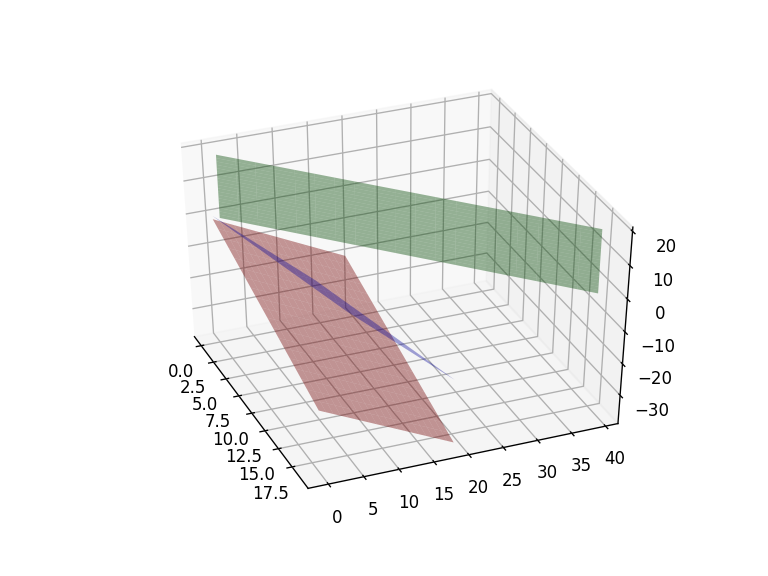

In [5]:
display(HTML('<h1>Section 2.2</h1>'))
display(HTML('<h2>Problem 20</h2>'))

display(Math(r'''
\text{Find a third equation that results in the matrix being singular.} \\
\begin{align}x + y + z &= 0 \text{; and} \\ x − 2y − z &= 1\text{.}\end{align}\\
'''))

display(Math(r'''
\text{We find a linear combination of the two rows:} \\
\begin{align}
{\begin{bmatrix}
1&1&1 \\
1&{-2}&{-1}\\
a_{31}&a_{32}&a_{33}\\
\end{bmatrix}}

&= {\begin{bmatrix}
0\\
1\\
x\\
\end{bmatrix}}\\

\text{We can easily get:}\\

{\begin{bmatrix}
2&{-1}&0
\end{bmatrix}}
&=
{0+1} \\
&={1}
\end{align}
'''))

fig, ax = plt.subplots(1, 1, subplot_kw={'projection':'3d'})

a,b,c,d = [2,-1,0,1]

matrix_coefficients = np.array([[1,1,1],
         [1,-2,-1],
         [a,b,c]])

matrix_dependents = np.array([0, -1, d])

x1, y1, z1, pt1 = visualisation_helpers.plot_2Dplane_in3D(coefficient_array=matrix_coefficients[0], d=matrix_dependents[0], n=20)
x2, y2, z2, pt2 = visualisation_helpers.plot_2Dplane_in3D(coefficient_array=matrix_coefficients[1], d=-matrix_dependents[1], n=20)
x3, y3, z3, pt3 = visualisation_helpers.plot_2Dplane_in3D(coefficient_array=matrix_coefficients[2], d=matrix_dependents[2], n=20)

ax.plot_surface(x1,y1,z1, color='red', alpha=0.4)
ax.plot_surface(x2,y2,z2, color='blue', alpha=0.4)
ax.plot_surface(x3,y3,z3, color='green', alpha=0.4)

Attributions for this notebook

https://stackoverflow.com/questions/19410733/how-to-draw-planes-from-a-set-of-linear-equations-in-python